In [17]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
with open('cleaned_df.pickle', 'rb') as file:
    df = pickle.load(file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
has_basement     21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 3.5 MB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)



In [27]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
len(y_test)

4320

In [29]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 42089005409.68142
Test Mean Squared Error: 38287037340.5627


In [30]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squared Error:', rmse_train)
print('Test Root Mean Squared Error:', rmse_test)

Train Root Mean Squared Error: 205156.05136013273
Test Root Mean Squared Error: 195670.73705734


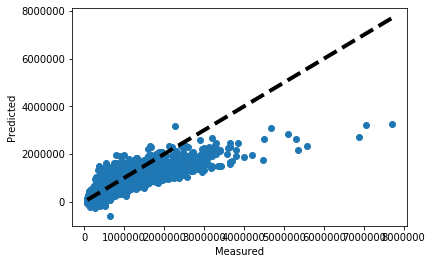

In [31]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

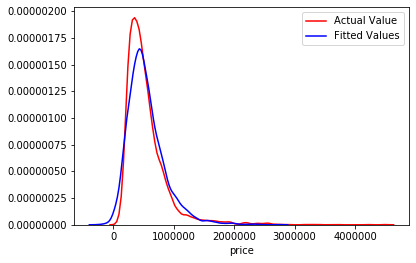

In [32]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [33]:
y_predicted = linreg.predict(X)

In [34]:
residuals = y - y_predicted

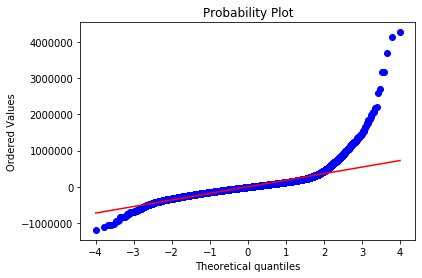

In [35]:
from scipy.stats import probplot

_ = probplot(residuals, plot=plt)

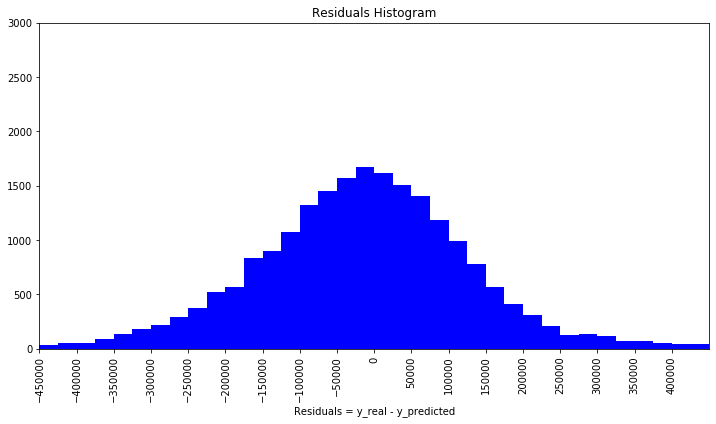

In [36]:
# Histogram for residuals
    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

In [37]:
data1 = df.drop(['id', 'date'], axis = 1)
y1 = data1.price
data1 = data1.drop(['price'], axis = 1)

In [38]:


linreg1 = LinearRegression()
linreg1.fit(data1, y1)
print(linreg1.score(data1, y1))



0.6981487095483874


In [39]:


y_predict = linreg1.predict(data1)
residuals1 = y - y_predict



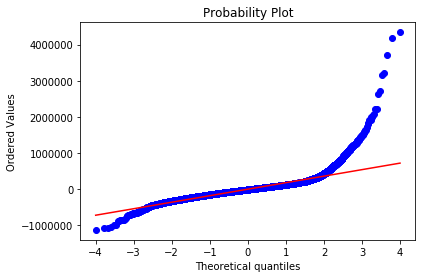

In [40]:
_ = probplot(residuals1, plot=plt)

## Creating dummies for categoricals and then checking linear regression one by one along with its R-squared and Rooted MSE

In [41]:
df_dv1 = df.copy()

In [42]:
zip_dummies = pd.get_dummies(df_dv1['zipcode'],prefix='zip')
df_zip = pd.concat([df_dv1, zip_dummies], axis=1)

In [43]:
df_zip.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data = df_zip.copy()
y = data['price']
X = data.drop(['price','date','id','zipcode', 'has_basement'], axis = 1)



In [45]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 26071742704.10279
Test Mean Squarred Error: 27859144912.894955


In [47]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 161467.46639525497
Test Root Mean Squarred Error: 166910.58957685984


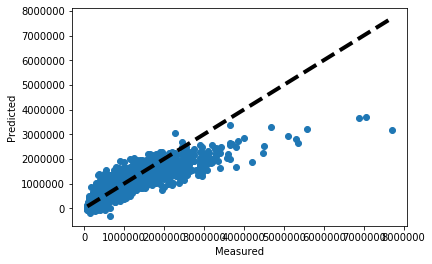

In [48]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

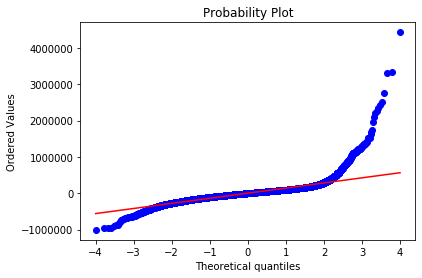

In [49]:
y_predicted = linreg.predict(X)
residuals = y - y_predicted
_ = probplot(residuals, plot=plt)

In [50]:

df_dv2 = df_zip.copy()
grd_dummies = pd.get_dummies(df_zip['grade'],prefix='grd')
df_zip_grd = pd.concat([df_dv2, grd_dummies], axis=1)
df_zip_grd.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
data = df_zip_grd
y = data['price']
X = data.drop(['price','date','id','zipcode', 'has_basement', 'grade'], axis = 1)


In [52]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 20818553353.612926
Test Mean Squared Error: 30808103508.380814


In [54]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squared Error:', rmse_train)
print('Test Root Mean Squared Error:', rmse_test)

Train Root Mean Squared Error: 144286.3588618582
Test Root Mean Squared Error: 175522.3732416492


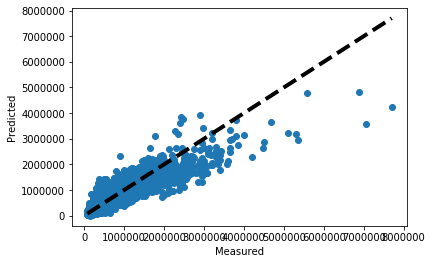

In [55]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

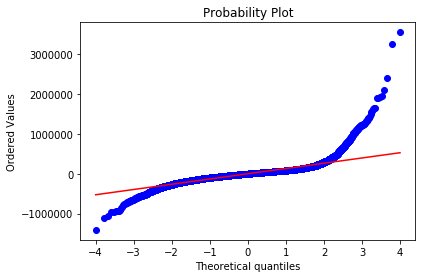

In [56]:
y_predicted = linreg.predict(X)
residuals = y - y_predicted
_ = probplot(residuals, plot=plt)

In [57]:
df_zip_grd[df_zip_grd['yr_renovated'] > 0]['yr_renovated'].value_counts()

2014.0    73
2013.0    31
2003.0    31
2007.0    30
2000.0    29
          ..
1971.0     1
1934.0     1
1953.0     1
1951.0     1
1954.0     1
Name: yr_renovated, Length: 69, dtype: int64

In [59]:
# add feature for living space and overall lot size comparison with 15 neighbour average.
# 1 means larger than neighbour
# 0 means smaller than neighbour

df_compared = df_zip_grd.copy()
df_compared['neighb_living_compared'] = 0
df_compared['neighb_lot_compared'] = 0
for index, row in df_compared.iterrows():
    if row['sqft_living'] > row['sqft_living15']:
        df_compared['neighb_living_compared'][index] = 1
    if row['sqft_lot'] > row['sqft_lot15']:
        df_compared['neighb_lot_compared'][index] = 1



C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [60]:
df_compared[df_compared['neighb_lot_compared'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,neighb_living_compared,neighb_lot_compared
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,1,0,0,0,0,0,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,0,1,0,0,0,0,0,1,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,1,0,0,0,0,0,0,0,0


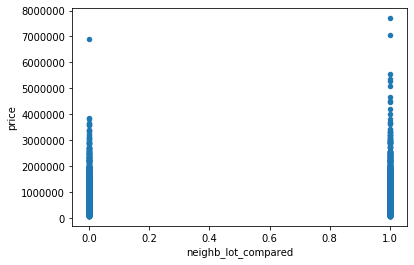

In [618]:
df_compared.plot(kind = 'scatter', x = 'neighb_lot_compared', y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


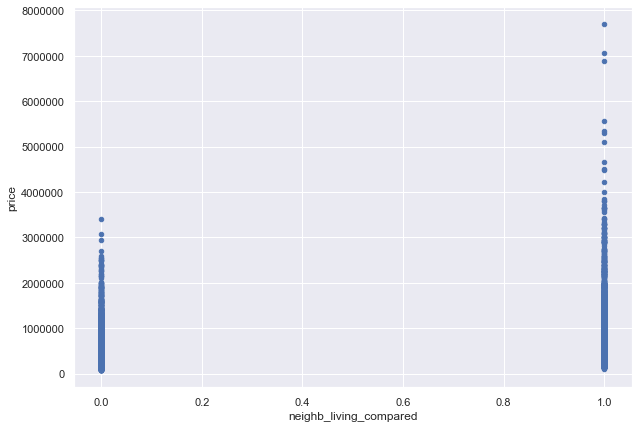

In [653]:
df_compared.plot(figsize=(10,7),kind = 'scatter', x = 'neighb_living_compared', y='price')

In [620]:
# A binary comparision of whether living space and lot size is larger than 
# the neighbour average looks like a good indicator for price

In [621]:
    data = df_compared.copy()
    y = data['price']
    X = data.drop(['price','date','id','zipcode', 'has_basement', 'grade',
                   'yr_renovated', 'renovated', 'floors', 'bathrooms'], axis = 1)
    # create data sets with an 80/20 split - train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train Root Mean Squarred Error:', rmse_train)
    print('Test Root Mean Squarred Error:', rmse_test)

Train Mean Squarred Error: 21492058646.697422
Test Mean Squarred Error: 27952131347.010265
Train Root Mean Squarred Error: 146601.70069510592
Test Root Mean Squarred Error: 167188.90916269016


In [622]:
def haversine_distance(lat1, lon1):
    # log, lat of the Seattle Space Needle, location i used to reference the center of seattle
    lat2 = 47.620422
    lon2 = -122.349358
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [623]:
df_dist = df_compared.copy()
df_dist['dist_to_center'] = 0
for index, row in df_dist.iterrows():
    df_dist['dist_to_center'][index] = haversine_distance(row['lat'], row['long'])

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [624]:
df_dist['dist_to_center'].head(10)

0    13
1    11
2    15
3    11
4    22
5    26
6    34
7    23
8    12
9    36
Name: dist_to_center, dtype: int64

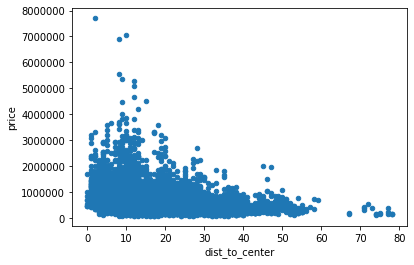

In [625]:
df_dist.plot(kind = 'scatter', x = 'dist_to_center', y='price')

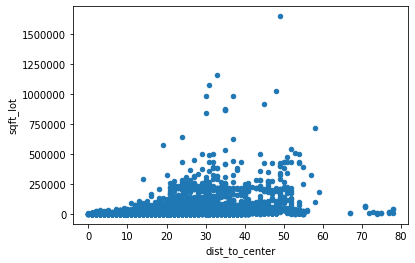

In [626]:
df_dist.plot(kind = 'scatter', x = 'dist_to_center', y='sqft_lot')

In [627]:
# showing sqft_lot vs distance to center of seattle shows as expected being low, inverse to price.

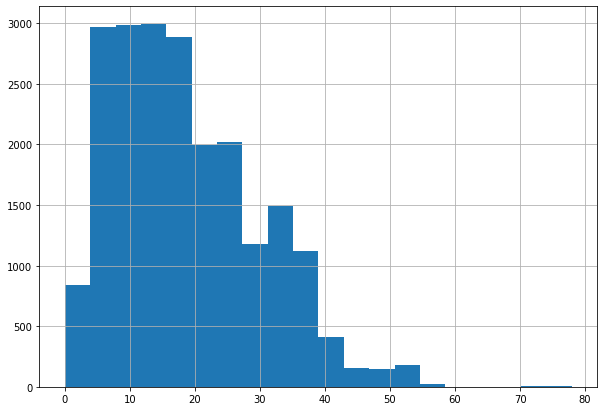

In [628]:
df_dist['dist_to_center'].hist(figsize=(10,7), bins = 20)


Most of the homes are closer to the center of the city, as expected density of homes increased in the center of cities, compared to the outer areas.


In [629]:
    data = df_dist.copy()
    y = data['price']
    X = data.drop(['price','date','id','zipcode', 'has_basement', 'grade',
                   'yr_renovated', 'renovated', 'floors', 'bathrooms', 'lat',
                   'long', 'sqft_living15', 'sqft_lot15', 'condition', 'yr_built'], axis = 1)
    # create data sets with an 80/20 split - train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train Root Mean Squarred Error:', rmse_train)
    print('Test Root Mean Squarred Error:', rmse_test)

Train Mean Squarred Error: 23184531292.01939
Test Mean Squarred Error: 23796718786.452606
Train Root Mean Squarred Error: 152264.67512860423
Test Root Mean Squarred Error: 154261.85136466048


In [630]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:03:23   Log-Likelihood:            -2.8604e+05
No. Observations:               21420   AIC:                         5.723e+05
Df Residuals:                   21331   BIC:                         5.730e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bedrooms               -8293.2164   1474.776     -5.623      0.000   -1.12e+04   -5402.545
sqft_living              165.3524      3.174     52.099      0.000     159.131     171.573
sqft_lot                   0.2038      0.028      7.313      0.000       0.149       0.258
waterfront              7.572e+05   1.34e+04     56.603      0.000    7.31e+05    7.83e+05
view                    1.168e+05   4016.473     29.071      0.000    1.09e+05    1.25e+05
sqft_above                21.0639      3.044      6.920      0.000      15.098      27.030
zip_98001              -2.557e+04   1.21e+04     -2.111      0.035   -4.93e+04   -1827.124
zip_98002               1021.5752   1.44e+04      0.071      0.944   -2.73e+04    2.93e+04
zip_98003               -3.73e+04   1.25e+04     -2.981      0.003   -6.18e+04   -1.28e+04
zip_98004               5.995e+05   9417.052     63.661      0.000    5.81e+05    6.18e+05
zip_98005               1.698e+05   1.21e+04     14.073      0.000    1.46e+05    1.93e+05
zip_98006               1.257e+05   7373.132     17.045      0.000    1.11e+05     1.4e+05
zip_98007               1.199e+05   1.31e+04      9.160      0.000    9.42e+04    1.45e+05
zip_98008               1.438e+05   9356.298     15.372      0.000    1.25e+05    1.62e+05
zip_98010               8.424e+04   1.94e+04      4.336      0.000    4.62e+04    1.22e+05
zip_98011               6222.9671   1.12e+04      0.556      0.578   -1.57e+04    2.82e+04
zip_98014               7.771e+04   1.73e+04      4.502      0.000    4.39e+04    1.12e+05
zip_98019               4.164e+04   1.35e+04      3.087      0.002    1.52e+04    6.81e+04
zip_98022               9.231e+04   2.01e+04      4.604      0.000     5.3e+04    1.32e+05
zip_98023              -5.416e+04   1.12e+04     -4.833      0.000   -7.61e+04   -3.22e+04
zip_98024                1.21e+05   1.92e+04      6.311      0.000    8.34e+04    1.59e+05
zip_98027               7.913e+04   8919.224      8.872      0.000    6.16e+04    9.66e+04
zip_98028              -8160.4383   9353.679     -0.872      0.383   -2.65e+04    1.02e+04
zip_98029                1.39e+05      1e+04     13.879      0.000    1.19e+05    1.59e+05
zip_98030              -4.962e+04   1.18e+04     -4.213      0.000   -7.27e+04   -2.65e+04
zip_98031              -5.789e+04   1.07e+04     -5.422      0.000   -7.88e+04    -3.7e+04
zip_98032              -6.002e+04   1.48e+04     -4.049      0.000   -8.91e+04    -3.1e+04
zip_98033               2.108e+05   7842.885     26.876      0.000    1.95e+05    2.26e+05
zip_98034               5.674e+04   6997.515      8.108      0.000     4.3e+04    7.05e+04
zip_98038               1.305e+04   1.17e+04      1.117      0.264   -9854.798     3.6e+04
zip_98039               1.065e+06   2.23e+04     47.865      0.000    1.02e+06  

In [631]:
# predicted = cross_val_predict(linreg, X, y, cv=10)

# fig, ax = plt.subplots()
# ax.scatter(y, predicted)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

In [632]:
#df_zip_grd[df_zip_grd['yr_renovated'] > 0]['yr_renovated'].head(50)
df_ren = df_dist.copy()

for index, row in df_ren.iterrows():
    if row['yr_renovated'] <= 2015.0 and row['yr_renovated'] > 2010:
        df_ren['renovated'][index] = 'within 5 years'
    elif row['yr_renovated'] <= 2010 and row['yr_renovated'] > 2005:
        df_ren['renovated'][index] = '5 - 10 years'
    elif row['yr_renovated'] <= 2005 and row['yr_renovated'] > 2000:
        df_ren['renovated'][index] = '10 - 15 years'
    elif row['yr_renovated'] <= 2000 and row['yr_renovated'] > 1995:
        df_ren['renovated'][index] = '15 - 20 years'
    elif row['yr_renovated'] <= 1995 and row['yr_renovated'] > 1990:
        df_ren['renovated'][index] = '20 - 25 years'
    elif row['yr_renovated'] <= 1990 and row['yr_renovated'] > 1985:
        df_ren['renovated'][index] = '25 - 30 years'
    elif row['yr_renovated'] <= 1985 and row['yr_renovated'] > 1980:
        df_ren['renovated'][index] = '30 - 35 years'
    else:
        df_ren['renovated'][index] = 'over 35 years'

C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\U

In [633]:
df_ren['renovated'].value_counts()

over 35 years     20784
within 5 years      135
10 - 15 years       114
5 - 10 years        101
15 - 20 years        83
25 - 30 years        80
20 - 25 years        67
30 - 35 years        56
Name: renovated, dtype: int64

In [634]:
df_ren.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,renovated,neighb_living_compared,neighb_lot_compared,dist_to_center
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,over 35 years,0,0,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,20 - 25 years,1,0,11
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,over 35 years,0,1,15
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,over 35 years,1,0,11
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,0,0,0,0,over 35 years,0,1,22


In [635]:
df_dv3 = df_ren.copy()
ren_dummies = pd.get_dummies(df_ren['renovated'],prefix='ren')
df_ren_dum = pd.concat([df_dv3, ren_dummies], axis=1)
df_ren_dum.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,neighb_lot_compared,dist_to_center,ren_10 - 15 years,ren_15 - 20 years,ren_20 - 25 years,ren_25 - 30 years,ren_30 - 35 years,ren_5 - 10 years,ren_over 35 years,ren_within 5 years
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,13,0,0,0,0,0,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,11,0,0,1,0,0,0,0,0


In [655]:
    data = df_ren_dum.copy()
    y = data['price']
    X = data.drop(['price','date','id','zipcode', 'has_basement', 'grade',
                   'yr_renovated', 'renovated', 'floors', 'bathrooms', 'lat',
                   'long', 'sqft_living15', 'sqft_lot15', 'condition', 'yr_built', 
                   'zip_98077', 'zip_98125', 'grd_9'], axis = 1)
    # create data sets with an 80/20 split - train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train Root Mean Squarred Error:', rmse_train)
    print('Test Root Mean Squarred Error:', rmse_test)

Train Mean Squarred Error: 22914866706.47722
Test Mean Squarred Error: 23676760929.624172
Train Root Mean Squarred Error: 151376.57251529122
Test Root Mean Squarred Error: 153872.5476802934


In [637]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1107.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:04:11   Log-Likelihood:            -2.8593e+05
No. Observations:               21420   AIC:                         5.720e+05
Df Residuals:                   21325   BIC:                         5.728e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bedrooms               -8181.2802   1467.599     -5.575      0.000   -1.11e+04   -5304.677
sqft_living              163.5787      3.160     51.772      0.000     157.386     169.772
sqft_lot                   0.2064      0.028      7.451      0.000       0.152       0.261
waterfront              7.511e+05   1.33e+04     56.271      0.000    7.25e+05    7.77e+05
view                    1.159e+05   3995.758     29.018      0.000    1.08e+05    1.24e+05
sqft_above                21.9460      3.029      7.245      0.000      16.008      27.884
zip_98001              -5.883e+04   1.31e+04     -4.506      0.000   -8.44e+04   -3.32e+04
zip_98002              -3.313e+04   1.52e+04     -2.173      0.030    -6.3e+04   -3246.813
zip_98003              -6.976e+04   1.35e+04     -5.162      0.000   -9.62e+04   -4.33e+04
zip_98004               5.596e+05   1.09e+04     51.293      0.000    5.38e+05    5.81e+05
zip_98005               1.363e+05   1.34e+04     10.191      0.000     1.1e+05    1.63e+05
zip_98006               9.185e+04   9394.371      9.777      0.000    7.34e+04     1.1e+05
zip_98007               8.674e+04   1.43e+04      6.045      0.000    5.86e+04    1.15e+05
zip_98008               1.102e+05    1.1e+04      9.992      0.000    8.86e+04    1.32e+05
zip_98010               5.096e+04   1.98e+04      2.577      0.010    1.22e+04    8.97e+04
zip_98011              -2.598e+04   1.26e+04     -2.055      0.040   -5.07e+04   -1205.860
zip_98014               4.412e+04   1.78e+04      2.476      0.013    9193.099     7.9e+04
zip_98019               8138.4511   1.44e+04      0.563      0.573   -2.02e+04    3.64e+04
zip_98022               5.759e+04   1.97e+04      2.927      0.003     1.9e+04    9.62e+04
zip_98023              -8.696e+04   1.22e+04     -7.102      0.000   -1.11e+05    -6.3e+04
zip_98024               8.481e+04   1.98e+04      4.277      0.000    4.59e+04    1.24e+05
zip_98027               4.707e+04   1.06e+04      4.450      0.000    2.63e+04    6.78e+04
zip_98028              -4.095e+04    1.1e+04     -3.720      0.000   -6.25e+04   -1.94e+04
zip_98029               1.071e+05   1.15e+04      9.296      0.000    8.46e+04     1.3e+05
zip_98030              -8.186e+04    1.3e+04     -6.311      0.000   -1.07e+05   -5.64e+04
zip_98031               -9.08e+04   1.21e+04     -7.507      0.000   -1.15e+05   -6.71e+04
zip_98032              -9.283e+04   1.59e+04     -5.824      0.000   -1.24e+05   -6.16e+04
zip_98033               1.764e+05   9679.625     18.228      0.000    1.57e+05    1.95e+05
zip_98034               2.458e+04   9042.789      2.718      0.007    6854.919    4.23e+04
zip_98038               -2.02e+04   1.25e+04     -1.617      0.106   -4.47e+04    4279.708
zip_98039               1.024e+06   2.31e+04     44.399      0.000    9.79e+05  

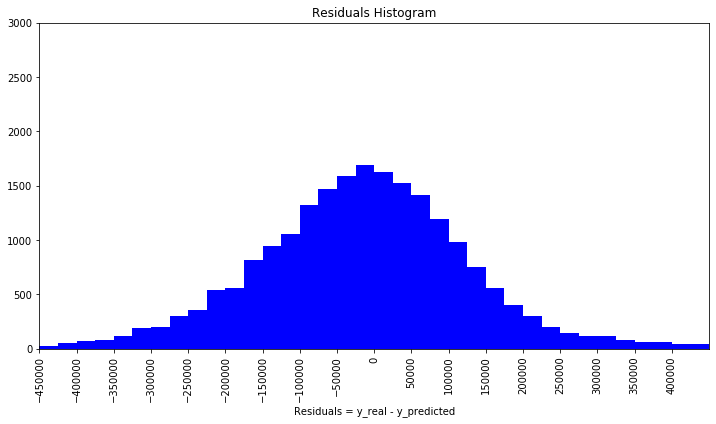

In [16]:
# Histogram for residuals
    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

In [638]:
abs(df_ren_dum.corr())>.60

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,neighb_lot_compared,dist_to_center,ren_10 - 15 years,ren_15 - 20 years,ren_20 - 25 years,ren_25 - 30 years,ren_30 - 35 years,ren_5 - 10 years,ren_over 35 years,ren_within 5 years
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ren_25 - 30 years,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
ren_30 - 35 years,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
ren_5 - 10 years,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
ren_over 35 years,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [640]:
with open('m2_df.pickle', 'wb') as f:
    pickle.dump(df_ren_dum, f)